In [43]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os


In [24]:
print(f"Tenserflow Version {tf.__version__}")

Tenserflow Version 2.14.0


### Check Out GPU and CPU  

In [25]:
tf.config.list_physical_devices("GPU")

[]

## Creating a Simple Classifier using Keras on MNIST dataset

In [26]:
mnist = tf.keras.datasets.mnist

In [27]:
mnist

<module 'keras.api._v2.keras.datasets.mnist' from 'C:\\Users\\ANURAG CHAUHAN\\anaconda3\\lib\\site-packages\\keras\\api\\_v2\\keras\\datasets\\mnist\\__init__.py'>

In [28]:
(X_train_full, y_train_full),(X_test, y_test) = mnist.load_data()

In [29]:
X_train_full.shape

(60000, 28, 28)

In [30]:
X_test.shape

(10000, 28, 28)

In [31]:
X_train_full[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [32]:
X_test[1][0]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0], dtype=uint8)

In [33]:
len(X_test[1][0])

28

### Create a Validation dataset from the full training dataset Scale the data  between 0 and 1 by dividing it by 255 as its an unsigned data between 0 - 255 range

In [34]:
X_valid , X_train = X_train_full[:5000]/255., X_train_full[5000:]/255.
y_valid , y_train = y_train_full[:5000], y_train_full[5000:]

### Scale the test dataset

In [35]:
X_test = X_test/255.

In [36]:
X_test

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

In [21]:
X_valid

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

### Let's view some data

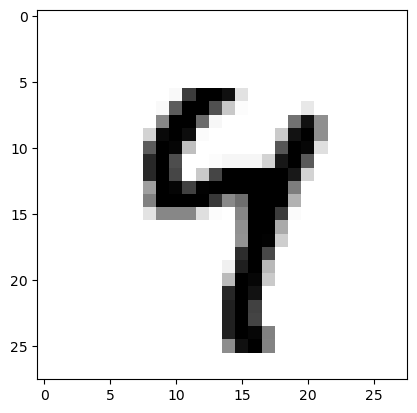

In [42]:
plt.imshow(X_train[2],cmap="binary")
plt.show()

<AxesSubplot:>

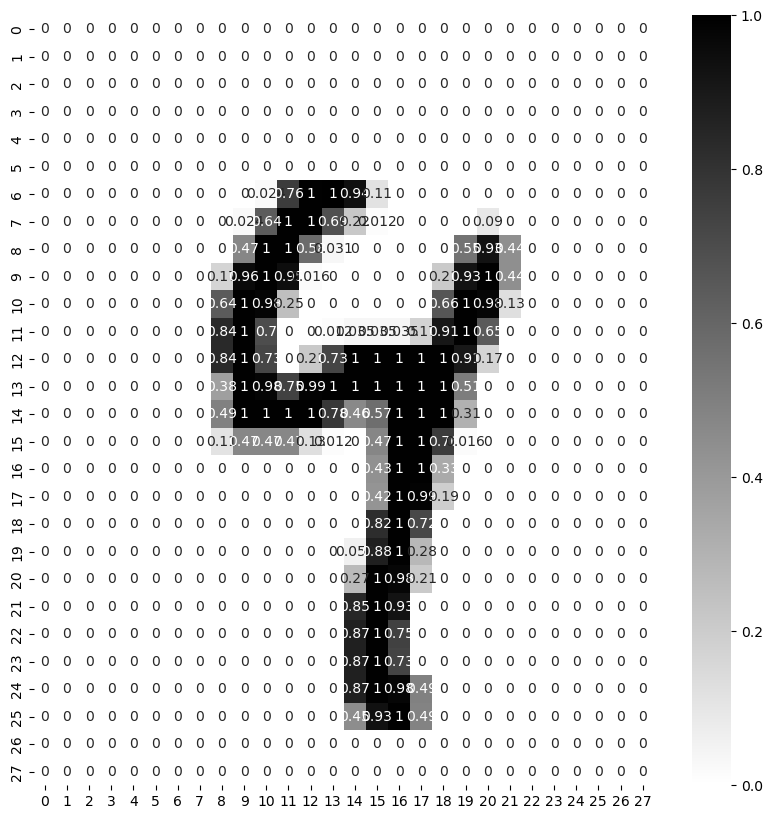

In [45]:
plt.figure(figsize=(10,10))
sns.heatmap(X_train[2], annot=True,cmap="binary")

### Input Shape is 28 * 28

## Creating layers of ANN

In [46]:
LAYERS = [tf.keras.layers.Flatten(input_shape = [28,28],name = 'inputLayer'),
          tf.keras.layers.Dense(300,activation='relu',name= "hidenLayer1"),
          tf.keras.layers.Dense(100, activation="relu",name = "hidenLayer2"),
          tf.keras.layers.Dense(10,activation="softmax",name= "outputLayer")
          ]

In [47]:
model_clf = tf.keras.models.Sequential(LAYERS)

In [48]:
model_clf.layers

In [50]:
model_clf.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputLayer (Flatten)        (None, 784)               0         
                                                                 
 hidenLayer1 (Dense)         (None, 300)               235500    
                                                                 
 hidenLayer2 (Dense)         (None, 100)               30100     
                                                                 
 outputLayer (Dense)         (None, 10)                1010      
                                                                 
Total params: 266610 (1.02 MB)
Trainable params: 266610 (1.02 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [53]:
LOSS_FUNCTION = tf.losses.sparse_categorical_crossentropy
OPTIMIZER = "SGD"
METRICS = ["accuracy"]

In [54]:
model_clf.compile(loss=LOSS_FUNCTION,
                 optimizer = OPTIMIZER,
                 metrics=METRICS)

## Traing The Model

In [55]:
EPOCHS =30
VALIDATION_SET = (X_valid, y_valid)
history = model_clf.fit(X_train, y_train,epochs=EPOCHS,validation_data=VALIDATION_SET,batch_size = 32)

Epoch 1/30
1719/1719 [==============================] - 11s 6ms/step - loss: 0.6235 - accuracy: 0.8372 - val_loss: 0.3091 - val_accuracy: 0.9182
Epoch 2/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.2874 - accuracy: 0.9189 - val_loss: 0.2369 - val_accuracy: 0.9352
Epoch 3/30
1719/1719 [==============================] - 10s 6ms/step - loss: 0.2324 - accuracy: 0.9348 - val_loss: 0.1985 - val_accuracy: 0.9462
Epoch 4/30
1719/1719 [==============================] - 10s 6ms/step - loss: 0.1968 - accuracy: 0.9446 - val_loss: 0.1727 - val_accuracy: 0.9534
Epoch 5/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.1703 - accuracy: 0.9514 - val_loss: 0.1526 - val_accuracy: 0.9588
Epoch 6/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.1505 - accuracy: 0.9573 - val_loss: 0.1397 - val_accuracy: 0.9610
Epoch 7/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.1344 - accuracy: 0.9615 - val_loss: 0.1348 - val_accura

In [56]:
history.params

{'verbose': 1, 'epochs': 30, 'steps': 1719}

In [57]:
pd.DataFrame(history.history)

,loss,accuracy,val_loss,val_accuracy
0,0.623522,0.837218,0.309143,0.9182
1,0.287352,0.918927,0.236864,0.9352
2,0.232392,0.934764,0.198469,0.9462
3,0.196797,0.944564,0.172656,0.9534
4,0.170343,0.951364,0.152562,0.9588
5,0.150503,0.957255,0.139710,0.9610
6,0.134410,0.961527,0.134783,0.9628
7,0.121324,0.965727,0.118789,0.9668
8,0.110202,0.968636,0.110804,0.9708
9,0.101008,0.971291,0.105215,0.9722


<AxesSubplot:>

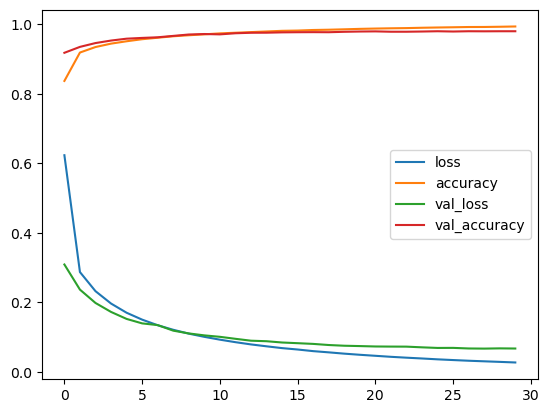

In [58]:
pd.DataFrame(history.history).plot()

In [59]:
model_clf.evaluate(X_test,y_test)

313/313 [==============================] - 2s 5ms/step - loss: 0.0712 - accuracy: 0.9761


[0.07121475040912628, 0.9761000275611877]

## Sample Check Test Data

In [60]:
X_new = X_test[:4]

In [61]:
actual = y_test[:4]

<AxesSubplot:>

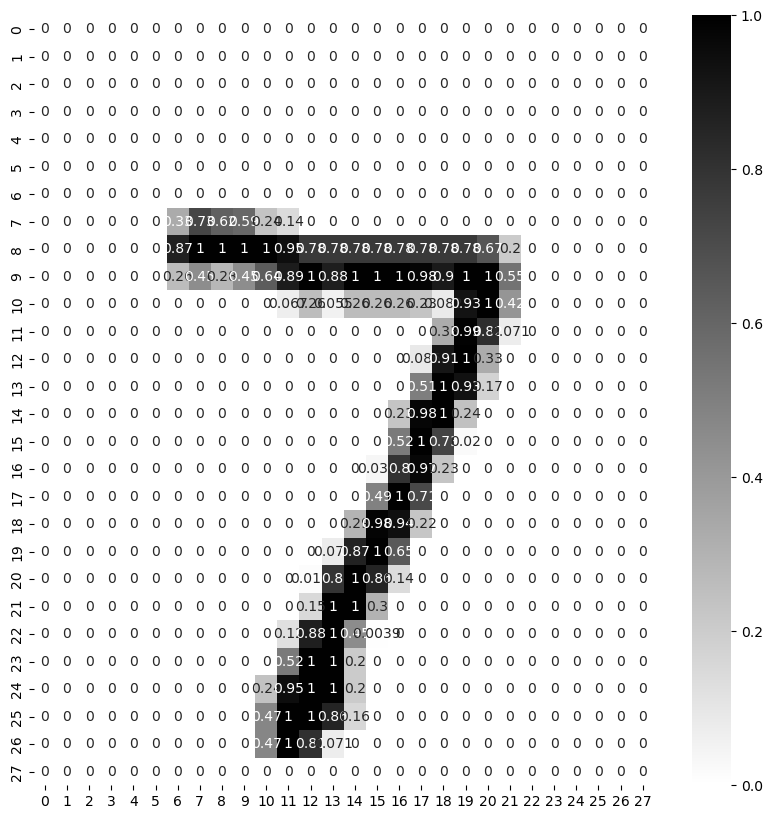

In [63]:
plt.figure(figsize=(10,10))
sns.heatmap(X_test[0],annot=True,cmap='binary')

In [65]:
y_prob = model_clf.predict(X_new)
y_prob.round(3)

1/1 [==============================] - 0s 42ms/step


array([[0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 1.   , 0.   ,
        0.   ],
       [0.   , 0.   , 1.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   ],
       [0.   , 0.997, 0.   , 0.   , 0.   , 0.   , 0.   , 0.001, 0.001,
        0.   ],
       [1.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   ]], dtype=float32)

In [67]:
y_pred = np.argmax(y_prob,axis=-1)

In [68]:
y_pred

array([7, 2, 1, 0], dtype=int64)

In [69]:
actual

array([7, 2, 1, 0], dtype=uint8)

### Here we can see that the predicted and actual values are same 

## Ploting

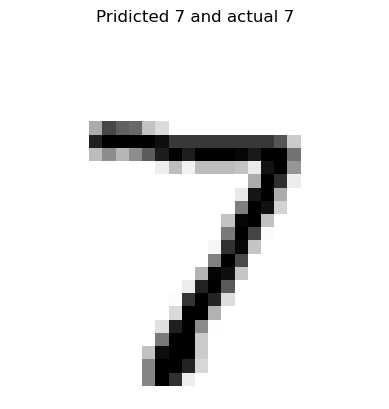

###########################################


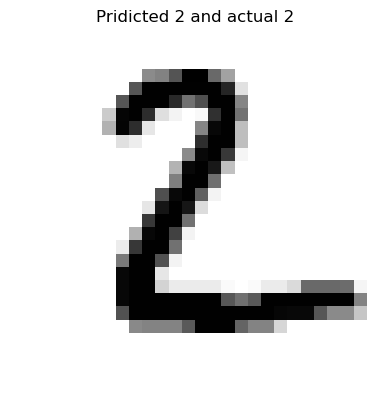

###########################################


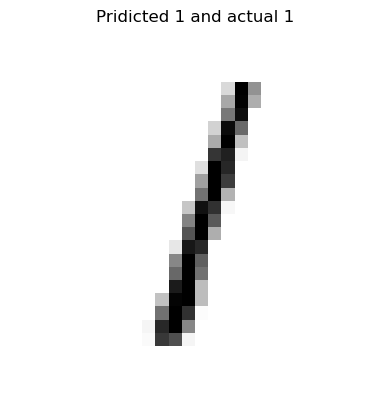

###########################################


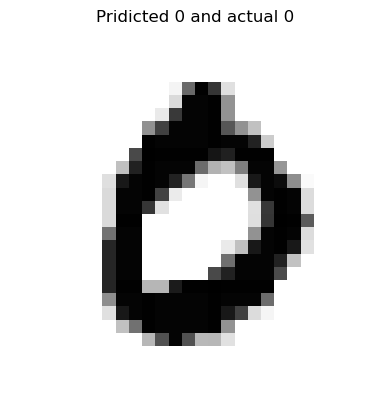

###########################################


In [71]:
for data, pred,actual_data in zip(X_new,y_pred,actual):
    plt.imshow(data,cmap='binary')
    plt.title(f"Pridicted {pred} and actual {actual_data}")
    plt.axis("off")
    plt.show()
    print("###########################################")